# Introduction To Convolutional Neural Networks And Computer Vision With Tensorflow:

Computer Vision is the practice of writing algorithms which can discover patterns in visual data, such as the camera of a self-driving car recognizing the car in front.

## Get The Data:

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close

'wget' is not recognized as an internal or external command,
operable program or batch file.


<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

## Inspect The Data (Become One With It):

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak #If on Colab, this would output 'test' and 'train'

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!ls pizza_steak/train/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!ls pizza_steak/train/steak

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [ ]:
# The extra file (which doesn't exist in the hard download) in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak #On Colab, you'd discover an image '.DS_Store' in the root folder

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [3]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectories
#class_names = class_names[1:] # remove .DS_Store 
#Would've been used if in Colab
print(class_names)

['pizza' 'steak']


In [4]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in hte image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}') # Show the shape of the image

    return img

['827764.jpg']
Image shape: (512, 340, 3)


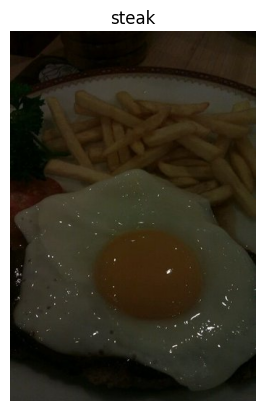

In [5]:
# View a random image from the training dataset
img = view_random_image(target_dir = 'pizza_steak/train/', target_class = 'steak')

['3778801.jpg']
Image shape: (384, 512, 3)


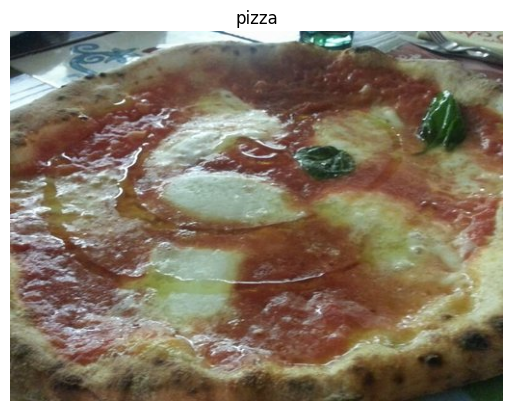

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir = 'pizza_steak/train/', target_class = 'pizza')

In [7]:
img

array([[[130, 144, 144],
        [132, 146, 146],
        [131, 145, 145],
        ...,
        [169, 183, 158],
        [166, 180, 155],
        [163, 177, 151]],

       [[129, 143, 143],
        [129, 143, 143],
        [126, 140, 140],
        ...,
        [158, 170, 146],
        [162, 174, 150],
        [167, 180, 154]],

       [[121, 135, 135],
        [120, 134, 134],
        [119, 133, 134],
        ...,
        [170, 180, 156],
        [170, 180, 156],
        [170, 180, 155]],

       ...,

       [[ 87,  80,  61],
        [ 87,  80,  61],
        [ 85,  78,  59],
        ...,
        [ 28,  51,  25],
        [ 34,  54,  29],
        [ 32,  52,  27]],

       [[ 85,  79,  57],
        [ 87,  81,  59],
        [ 88,  82,  60],
        ...,
        [ 29,  51,  28],
        [ 35,  54,  32],
        [ 35,  54,  32]],

       [[ 81,  75,  53],
        [ 85,  79,  57],
        [ 91,  85,  63],
        ...,
        [ 30,  52,  29],
        [ 39,  58,  36],
        [ 40,  59,  37]]

In [8]:
img.dtype

dtype('uint8')

In [9]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[130, 144, 144],
        [132, 146, 146],
        [131, 145, 145],
        ...,
        [169, 183, 158],
        [166, 180, 155],
        [163, 177, 151]],

       [[129, 143, 143],
        [129, 143, 143],
        [126, 140, 140],
        ...,
        [158, 170, 146],
        [162, 174, 150],
        [167, 180, 154]],

       [[121, 135, 135],
        [120, 134, 134],
        [119, 133, 134],
        ...,
        [170, 180, 156],
        [170, 180, 156],
        [170, 180, 155]],

       ...,

       [[ 87,  80,  61],
        [ 87,  80,  61],
        [ 85,  78,  59],
        ...,
        [ 28,  51,  25],
        [ 34,  54,  29],
        [ 32,  52,  27]],

       [[ 85,  79,  57],
        [ 87,  81,  59],
        [ 88,  82,  60],
        ...,
        [ 29,  51,  28],
        [ 35,  54,  32],
        [ 35,  54,  32]],

       [[ 81,  75,  53],
        [ 85,  79,  57],
        [ 91,  85,  63],
        ...,
        [ 30,  52,  2

In [ ]:
# View the image shape
img.shape # Returns width, height, color channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [37]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.02352941, 0.02352941, 0.05490196],
        [0.01960784, 0.01960784, 0.05098039],
        [0.01960784, 0.01960784, 0.05098039],
        ...,
        [0.49411765, 0.41568627, 0.41176471],
        [0.49803922, 0.41568627, 0.41176471],
        [0.49803922, 0.41568627, 0.41176471]],

       [[0.02745098, 0.02745098, 0.05882353],
        [0.02745098, 0.02745098, 0.05882353],
        [0.02352941, 0.02352941, 0.05490196],
        ...,
        [0.48235294, 0.40392157, 0.4       ],
        [0.48235294, 0.4       , 0.39607843],
        [0.47843137, 0.39607843, 0.39215686]],

       [[0.03137255, 0.03137255, 0.0627451 ],
        [0.03137255, 0.03137255, 0.0627451 ],
        [0.03137255, 0.03137255, 0.0627451 ],
        ...,
        [0.48627451, 0.40784314, 0.40392157],
        [0.49019608, 0.40784314, 0.40392157],
        [0.48627451, 0.40392157, 0.4       ]],

       ...,

       [[0.21176471, 0.19607843, 0.14901961],
        [0.19215686, 0.18431373, 0.1254902 ],
        [0.18431373, 0

## An End-To-End Example:

Let's build a convolutional neural network to find patterns in our images; more specifically, we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1. / 255) #ImageDataGenerator generates batches of tensor image data with real-time data augmentation
valid_datagen = ImageDataGenerator(rescale = 1. / 255)

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42) #flow_from_directory takes the path to a directory & generates batches of augmented data

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

#We'll explain the rest in more detail when we rebuild the model from the ground up

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 892ms/step - accuracy: 0.6322 - loss: 0.6303 - val_accuracy: 0.8240 - val_loss: 0.3698
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 951ms/step - accuracy: 0.8006 - loss: 0.4388 - val_accuracy: 0.8520 - val_loss: 0.3419
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 911ms/step - accuracy: 0.8318 - loss: 0.3943 - val_accuracy: 0.8580 - val_loss: 0.3339
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 915ms/step - accuracy: 0.8467 - loss: 0.3542 - val_accuracy: 0.8280 - val_loss: 0.3942
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 974ms/step - accuracy: 0.8317 - loss: 0.3772 - val_accuracy: 0.8560 - val_loss: 0.3257


🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, (ONLY ON COLAB) make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

In [44]:
# Get a model summary
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

🛠️ **Practice/Exercise:** Go through the CNN explainer website for a minimum of 10 minutes and compare our neural network with theirs: https://poloclub.github.io/cnn-explainer/

## Using The Same Model As Before:

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow Playground:](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.93036&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5092 - loss: 3.5139 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 934ms/step - accuracy: 0.5038 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 317ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 331ms/step - accuracy: 0.4835 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
# Get a summary of model_2
model_2.summary() #Notice that there's way more trainable and total parameters in this model than the CNN

#Right now, this model is literally guessing on the validation set; can you upgrade this model to make it do better?

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [117]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'valid_data' is not defined

In [ ]:
# Get a summary of model_3
model_3.summary() #This model did okay, but we can't let it off the hook due to the extreme number of trainable and total parameters

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So, even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

In [50]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Binary Classification - Let's Break It Down:

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become One With The Data:

['2315295.jpg']
Image shape: (512, 512, 3)
['63480.jpg']
Image shape: (512, 384, 3)


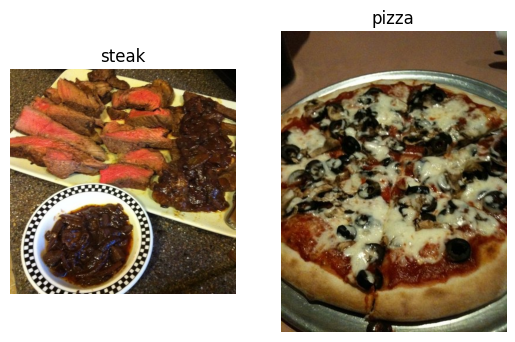

In [64]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess The Data (Prepare It For A Model):

In [5]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://x.com/ylecun/status/989610208497360896?lang=en

In [6]:
# Create train and test data generators and rescale the data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1 / 255.) #ImageDataGenerator generates batches of tensor image data with real-time data augmentation
test_datagen = ImageDataGenerator(rescale = 1 / 255.) #The rescale parameter scales all the pixel values of an image by a float factor after all other transformations, making it possible to load and scale image data in one step

#Note: Be sure to use float division and not integer division in the rescale parameter!

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)
#The flow_from_directory method takes the path to a directory & generates batches of augmented data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             class_mode = 'binary',
                                             batch_size = 32)

#The directory parameter, which is the default first parameter if not explicitly stated, specifies the folder where the images are loaded from
#The target_size parameter is a tuple (height, width) that sets the size of the images loaded to a new, specified size
#The class_mode parameter sets the type of data you're working with, aka the type of model you're going to use the images on (binary, categorical, sparse, etc.)
#The batch_size parameter is the size of minibatches to load the data into
#If your images are loading in at with a high skew towards one color, the color channels may be switched, so use the color_mode parameter to switch from the default 'rgb' setting to 'bgr' or something similar

#If your images' pixel values are already loaded into dataframes, use the flow_from_dataframe method instead

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [71]:
# Get a sample of a train data batch
images, labels = train_data.next() #DEPRECATED: Get the "next" batch of images/labels in tran_data
len(images), len(labels)

AttributeError: 'DirectoryIterator' object has no attribute 'next'

In [15]:
# Get a sample of a train data batch
images, labels = train_data[0] #Now you have to index a batch manually
len(images), len(labels)

(32, 32)

In [16]:
# How many batches are there?
len(train_data) #When it can't be evenly divided, the number of batches is always rounded up to include a partial batch

47

In [17]:
1500/32

46.875

In [18]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.9333334 , 0.87843144, 0.7411765 ],
          [0.96470594, 0.909804  , 0.7725491 ],
          [0.9450981 , 0.89019614, 0.75294125],
          ...,
          [0.5647059 , 0.5686275 , 0.34509805],
          [0.52156866, 0.50980395, 0.30980393],
          [0.49803925, 0.47450984, 0.28627452]],
 
         [[0.9333334 , 0.87843144, 0.7411765 ],
          [0.93725497, 0.882353  , 0.74509805],
          [0.92549026, 0.8705883 , 0.73333335],
          ...,
          [0.53333336, 0.53333336, 0.32156864],
          [0.5019608 , 0.48627454, 0.29803923],
          [0.5411765 , 0.5137255 , 0.33333334]],
 
         [[0.94117653, 0.882353  , 0.75294125],
          [0.9450981 , 0.8862746 , 0.7568628 ],
          [0.9568628 , 0.8980393 , 0.7686275 ],
          ...,
          [0.38431376, 0.38431376, 0.18823531],
          [0.43921572, 0.43137258, 0.24313727],
          [0.49411768, 0.4666667 , 0.28627452]],
 
         ...,
 
         [[0.20784315, 0.1137255 , 0.07450981],
          [0.20000

In [19]:
images[7], images[7].shape

(array([[[0.5137255 , 0.2901961 , 0.02745098],
         [0.5137255 , 0.2901961 , 0.02745098],
         [0.5176471 , 0.29411766, 0.03137255],
         ...,
         [0.54901963, 0.59607846, 0.5882353 ],
         [0.5411765 , 0.5882353 , 0.5803922 ],
         [0.54901963, 0.59607846, 0.5882353 ]],
 
        [[0.4901961 , 0.27450982, 0.01960784],
         [0.49803925, 0.28235295, 0.02745098],
         [0.49803925, 0.28235295, 0.01960784],
         ...,
         [0.5568628 , 0.6039216 , 0.59607846],
         [0.54509807, 0.5921569 , 0.58431375],
         [0.5411765 , 0.5882353 , 0.5803922 ]],
 
        [[0.4784314 , 0.2627451 , 0.01176471],
         [0.5019608 , 0.28627452, 0.03137255],
         [0.5058824 , 0.2901961 , 0.02745098],
         ...,
         [0.5568628 , 0.6039216 , 0.6039216 ],
         [0.5529412 , 0.6       , 0.5921569 ],
         [0.54901963, 0.59607846, 0.5882353 ]],
 
        ...,
 
        [[0.4039216 , 0.427451  , 0.427451  ],
         [0.4039216 , 0.427451  , 0.42745

In [20]:
# View the first batch of labels
labels

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (Start With A Baseline):

A baseline is a relatively simple or existing result that you setup when beginning a machine learning experiment, and then as you keep experimenting, you try to beat the baseline.

🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [8]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [9]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([

    # Input layer (specify input shape)
    Conv2D(filters = 10, #Decides how many filters should pass over an input tensor (e.g. sliding windows over an image; Typical values = 10, 32, 64, and 128; Higher values lead to more complex models); Is the first parameter by default
           kernel_size = 3, #Aka filter size; Determines the shapeof hte filters (sliding windows) over the output; Typical values = 3, 5, and 7; Lower values learn smaller features, while higher values learn larger features; Can also be tuples for non-square window shapes; Is the second parameter by default
           strides = 1, #The number of steps a filter takes across an image at a time (e.g. if strides = 1, a filter moves across an image 1 pixel at a time), Typical values = 1 (default) and 2; Basically determines how much the output shrinks when padding is "valid", Is the third parameter by default
           padding = 'valid', #Pads the target tensor with zeroes (if "same") to preserve input shape, or leaves the target tensor as is (if "valid" (default value)), lowering output shape; Basically, adds blank pixels to the edges of the kernel map, which also determines if the output shrinks ("valid") (sheds edges on all sides) or stays the same ("same"); Is the fourth parameter by default
           activation = 'relu',
           input_shape = (224, 224, 3)),

    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # Output layer (working with binary classification, so only 1 output neuron)
])

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Again, but without all the explanatory comments for simplicity:

In [10]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

🛠️ **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes:

https://poloclub.github.io/cnn-explainer/

In [11]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [12]:
# Get a summary of our model
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit The Model:

In [13]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [14]:
# Fit the model
history_4 = model_4.fit(train_data, #This is a combination of labels and sample data
                        epochs = 5,
                        steps_per_epoch = len(train_data), # Set to the length of the training data to go through all of the batches
                        validation_data = test_data,
                        validation_steps = len(test_data)) #Same idea as steps_per_epoch

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 817ms/step - accuracy: 0.5661 - loss: 0.8291 - val_accuracy: 0.7500 - val_loss: 0.5126
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 896ms/step - accuracy: 0.8115 - loss: 0.4287 - val_accuracy: 0.8520 - val_loss: 0.3668
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 884ms/step - accuracy: 0.9036 - loss: 0.2741 - val_accuracy: 0.8660 - val_loss: 0.3257
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 965ms/step - accuracy: 0.9632 - loss: 0.1239 - val_accuracy: 0.8600 - val_loss: 0.3642
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9926 - loss: 0.0625 - val_accuracy: 0.8300 - val_loss: 0.4599


In [ ]:
#Remind ourselves of the end-to-end model's accuracy
model_1.evaluate(test_data) #Our baseline model's accuracy may improve if...

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.8493 - loss: 0.3770


[0.384431928396225, 0.8460000157356262]

In [ ]:
#Remind ourselves of model_1's structure
model_1.summary() #...we add some max pooling layers!

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### 5. Evaluating Our Model:

It looks like our model is learning something; let's evaluate it.

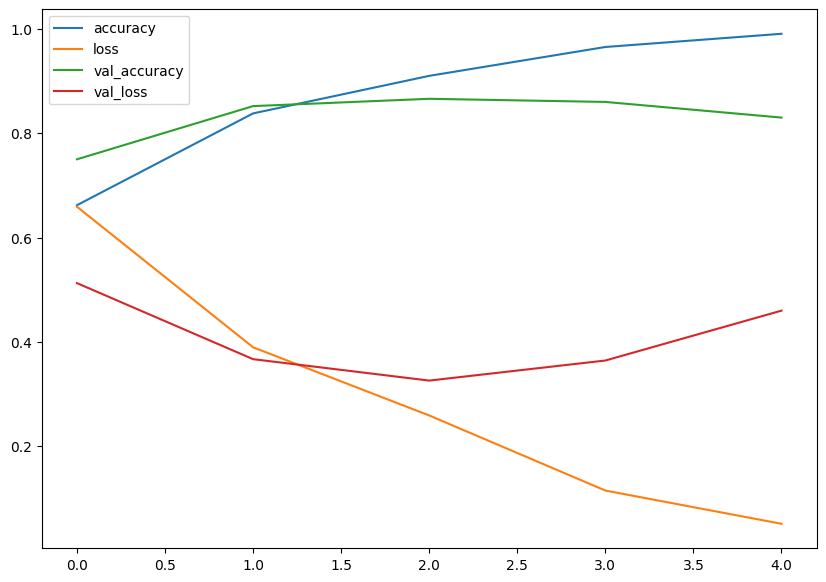

In [15]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7));

In [16]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs did we run for?

    # Plot loss
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend();

🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset *too well*, and thus the model's ability to generalize to unseen data will be diminished.

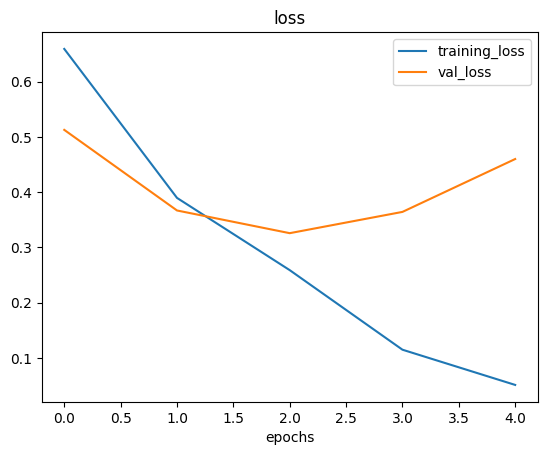

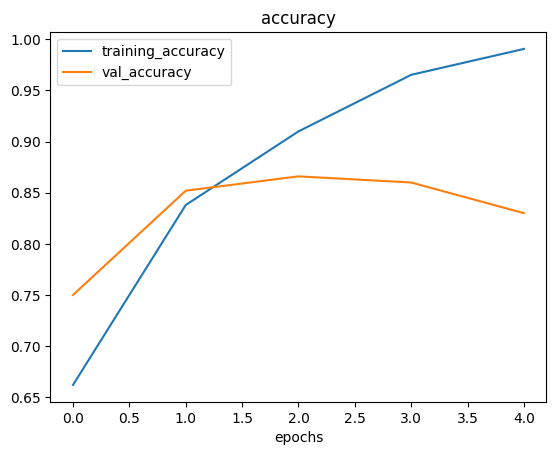

In [17]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates); when there are large differences, your model may be **overfitting**.

### 6. Adjust The Model Parameters:

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

🔑 **Note:** Reducing overfitting is also known as **regularization**

In [18]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2), #Max Pooling layers reduce the size of images by obtaining the most important features of an image for each color channel (taking the max value of a cluster of pixels and keeping it as a single pixel)
    #pool_size is the factor to downscale by (size of the square of pixels to compress into one); int values for squares, tuples for rectangles
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Again, but without all the explanatory comments for simplicity:

In [19]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [20]:
# Compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [21]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 488ms/step - accuracy: 0.5852 - loss: 0.6683 - val_accuracy: 0.7560 - val_loss: 0.5008
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 471ms/step - accuracy: 0.7475 - loss: 0.5278 - val_accuracy: 0.8000 - val_loss: 0.4250
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 456ms/step - accuracy: 0.8339 - loss: 0.4229 - val_accuracy: 0.8400 - val_loss: 0.3808
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 449ms/step - accuracy: 0.8382 - loss: 0.3951 - val_accuracy: 0.8560 - val_loss: 0.3504
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 431ms/step - accuracy: 0.8576 - loss: 0.3482 - val_accuracy: 0.8700 - val_loss: 0.3385


In [22]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [23]:
#Compare structure to model_4
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

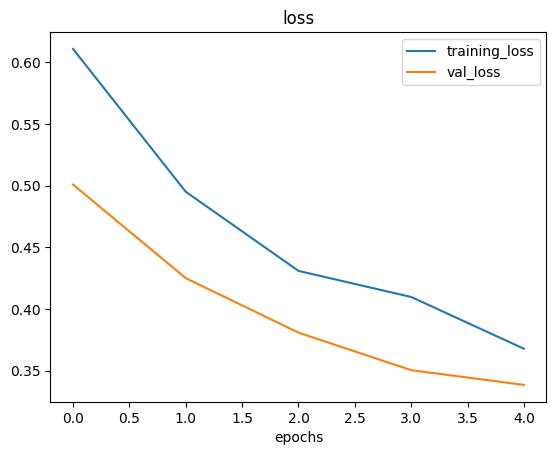

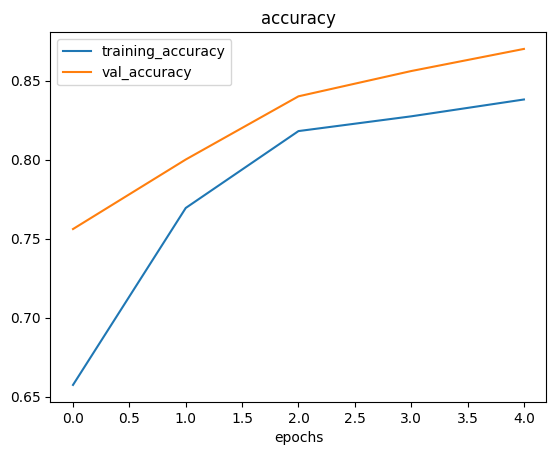

In [24]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening Our Bag Of Tricks And Finding Data Augmentation:

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                            rotation_range = 0.2, # How much do you want to rotate an image?
                                            shear_range = 0.2, # How much do you want to shear an image
                                            zoom_range = 0.2, # Zoom in randomly on an image
                                            width_shift_range = 0.2, # Move your image around on the x-axis
                                            height_shift_range = 0.2, # Move your image around on the y-axis
                                            horizontal_flip = True) # Do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it, or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False) # For demonstration only

# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)

# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [43]:
# Get sample adata batches
images, labels = train_data[0]
augmented_images, augmented_labels = train_data_augmented[0] #Note: Labels aren't augmented... only data (images)

Showing image number: 18


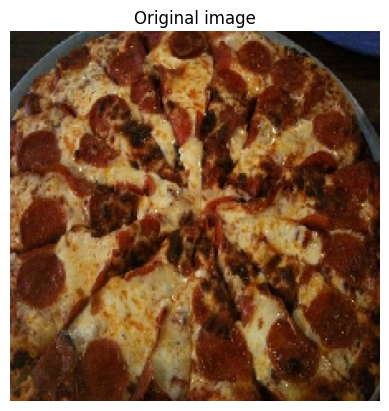

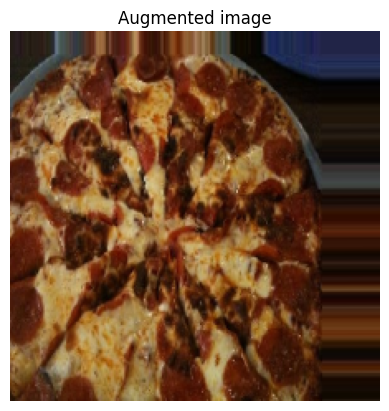

In [44]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # Our batch sizes are 32
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

Now that we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [45]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model 6 on augmented training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.2953 - loss: 0.7058 - val_accuracy: 0.5180 - val_loss: 0.6928
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5023 - loss: 0.6933 - val_accuracy: 0.5440 - val_loss: 0.6922
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 756ms/step - accuracy: 0.5271 - loss: 0.6958 - val_accuracy: 0.6160 - val_loss: 0.6913
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 906ms/step - accuracy: 0.5828 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6710
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 827ms/step - accuracy: 0.5666 - loss: 0.6866 - val_accuracy: 0.8100 - val_loss: 0.5916


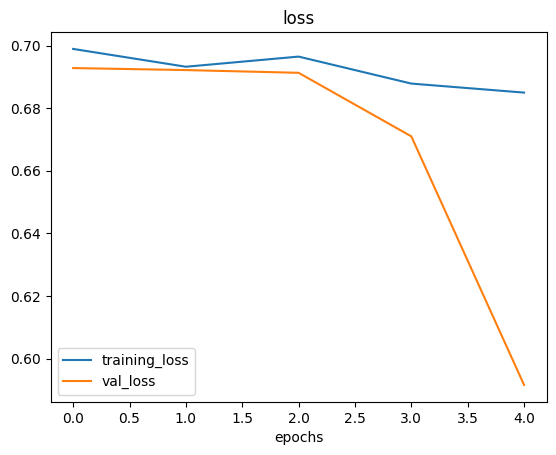

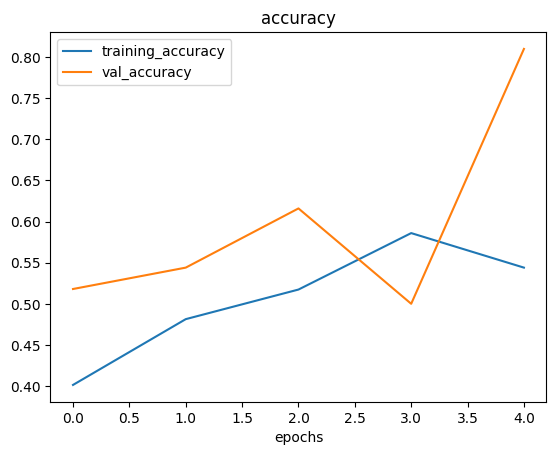

In [ ]:
# Check our model's training curves
plot_loss_curves(history_6) #Why does the model perform poorly at the beginning and slowly start to correct itself over time when the data is acquired in order? Think about it before moving on

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [47]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
target_size = (224, 224),
class_mode = 'binary',
batch_size = 32,
shuffle = True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # We're fitting on augmented and shuffled data now
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5278 - loss: 0.6805 - val_accuracy: 0.7000 - val_loss: 0.5441
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.7325 - loss: 0.5366 - val_accuracy: 0.8420 - val_loss: 0.3598
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7931 - loss: 0.4607 - val_accuracy: 0.8700 - val_loss: 0.3389
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 1000ms/step - accuracy: 0.7943 - loss: 0.4502 - val_accuracy: 0.8740 - val_loss: 0.3224
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7951 - loss: 0.4600 - val_accuracy: 0.8700 - val_loss: 0.3009


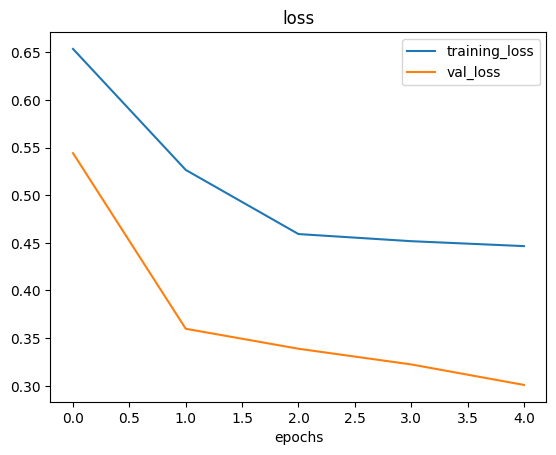

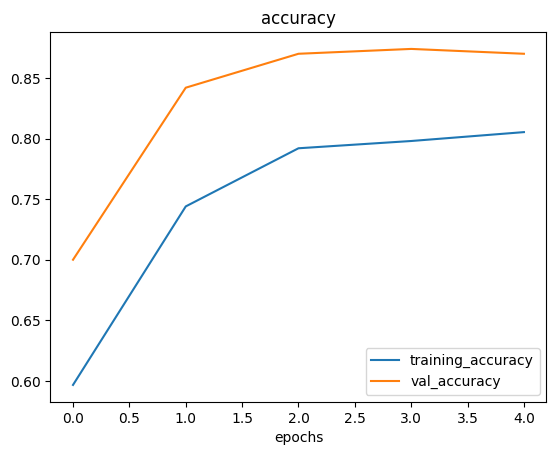

In [49]:
# Plot loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat Until Satisfied:

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

🛠️ **Practice:** Recreate the model on the CNN explainer website (same as `model_1` and see how it performs on the augmented shuffled training data.)

## Making A Prediction With Our Trained Model On Our Own Custom Data:

In [50]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


'wget' is not recognized as an internal or external command,
operable program or batch file.


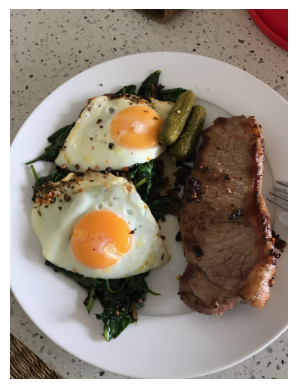

In [53]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [54]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [55]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [61]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
    """
    Reads an image from filename, turns it into a tensor, and reshapes it to (img_shape, img_shape, color_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [62]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [66]:
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


array([[0.8268028]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability; wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [65]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [68]:
# We can index the predicted class by rounding the prediction probability and index it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [69]:
def pred_and_plot(model, filename, class_names = class_names):
    """
    Imports an image located at filename, makes a prediction with model, and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


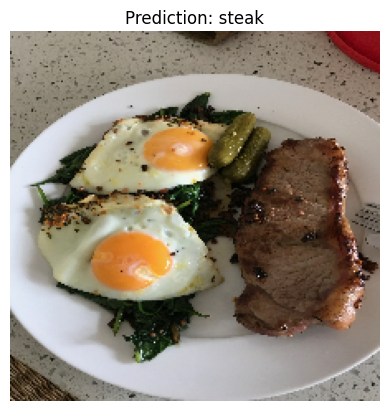

In [70]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg')

Our model works! Let's try it on another image... this time pizza 🍕

'wget' is not recognized as an internal or external command,
operable program or batch file.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


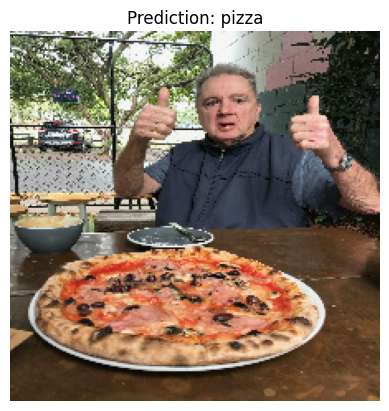

In [71]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# Multi-Class Image Classification:

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak); now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import And Become One With The Data:

In [73]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [75]:
import os

# Walk through 10 class of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'')

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data\test'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'
There are 10 directori

In [126]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [77]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['90831.jpg']
Image shape: (384, 512, 3)


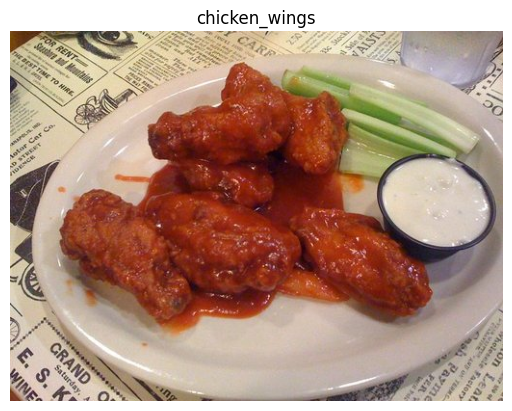

In [81]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

### 2. Preprocess The Data (Prepare It For A Model):

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1 / 255.)
test_datagen = ImageDataGenerator(rescale = 1 / 255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create A Model (Start With A Baseline):

We've been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)... How about we just take their model (also on 10 classes) and use it for our problem...?

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
# Create our model (very similar to previous models but actually the same as the CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = 'relu'), #Activations can also be their own layers
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax') # Changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Fit A Model:

In [88]:
# Fit the model
history_8 = model_8.fit(train_data, # Now 10 different classes
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - accuracy: 0.1956 - loss: 2.1846 - val_accuracy: 0.3100 - val_loss: 1.9492
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.3819 - loss: 1.8086 - val_accuracy: 0.3608 - val_loss: 1.8321
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 161s 686ms/step - accuracy: 0.5051 - loss: 1.4790 - val_accuracy: 0.3432 - val_loss: 1.9425
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 177s 752ms/step - accuracy: 0.7069 - loss: 0.9061 - val_accuracy: 0.3076 - val_loss: 2.4416
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 158s 672ms/step - accuracy: 0.8754 - loss: 0.4244 - val_accuracy: 0.3000 - val_loss: 3.2151


In [87]:
len(train_data)

235

### 5. Evaluate The Model:

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data) #Given that guessing with 10 classes is 0.1, the model's already doing better than guessing, although it isn't great yet

79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 308ms/step - accuracy: 0.3001 - loss: 3.1783


[3.2151269912719727, 0.30000001192092896]

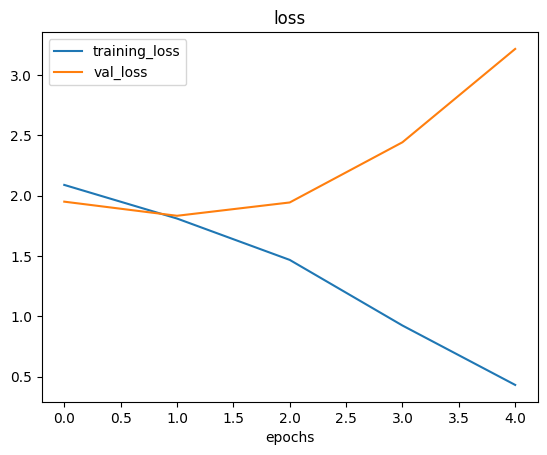

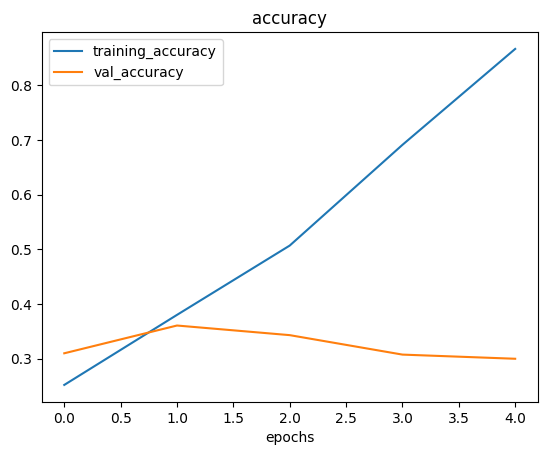

In [90]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

### 6. Adjust The Model Hyperparameters (To Beat The Baseline/Reduce Overfitting):

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try to fix overfitting by...

* **Get more data** - Having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - If our current model is overfitting the data, it may be too complicated of a model; one way to simplify a model is to: reduct # of layers or reduce # hidden units in layers
* **Use data augmentation** - Data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - Transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [92]:
# How about we try to simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_9.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 472ms/step - accuracy: 0.4147 - loss: 1.7325 - val_accuracy: 0.3024 - val_loss: 2.0234
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 116s 493ms/step - accuracy: 0.5505 - loss: 1.3840 - val_accuracy: 0.3208 - val_loss: 2.0658
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 194s 826ms/step - accuracy: 0.7322 - loss: 0.8846 - val_accuracy: 0.3052 - val_loss: 2.3334
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 164s 693ms/step - accuracy: 0.8759 - loss: 0.4898 - val_accuracy: 0.2872 - val_loss: 2.7940
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 168s 719ms/step - accuracy: 0.9480 - loss: 0.2428 - val_accuracy: 0.2820 - val_loss: 3.3716


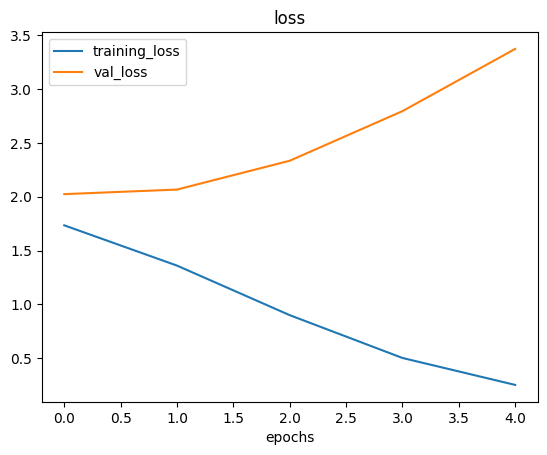

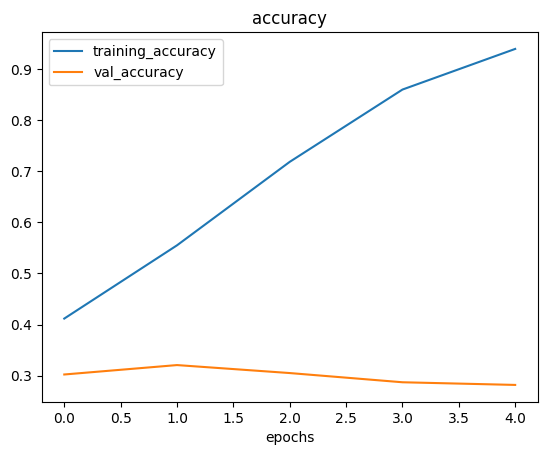

In [96]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [97]:
model_9.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

In [98]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying To Reduce Overfitting With Data Augmentation:

Let's try to improve our model' results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1 / 255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [102]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8) #clone_model copies another model, but the result has its internally learned patterns reset

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

In [103]:
model_10.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model_8.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [105]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

c:\Users\Jake\Documents\Udemy Courses\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 681s 3s/step - accuracy: 0.1315 - loss: 2.2921 - val_accuracy: 0.2596 - val_loss: 2.0468
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.2383 - loss: 2.0927 - val_accuracy: 0.3288 - val_loss: 1.9373
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.2860 - loss: 2.0268 - val_accuracy: 0.3556 - val_loss: 1.8207
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 602s 3s/step - accuracy: 0.3006 - loss: 1.9780 - val_accuracy: 0.3756 - val_loss: 1.8036
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.3108 - loss: 1.9416 - val_accuracy: 0.3768 - val_loss: 1.8229


In [106]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.3079 - loss: 3.1759


[3.2151272296905518, 0.30000001192092896]

In [107]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.3831 - loss: 1.8122


[1.8228838443756104, 0.376800000667572]

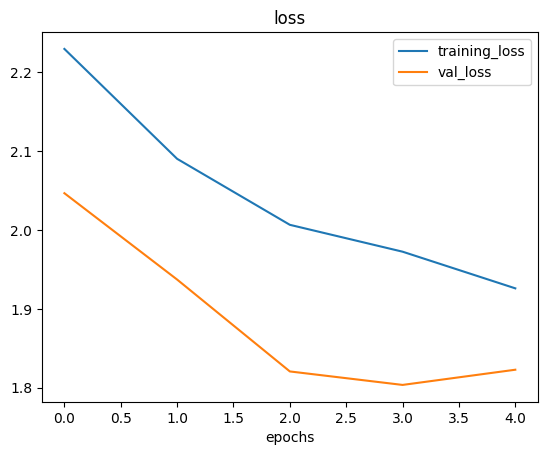

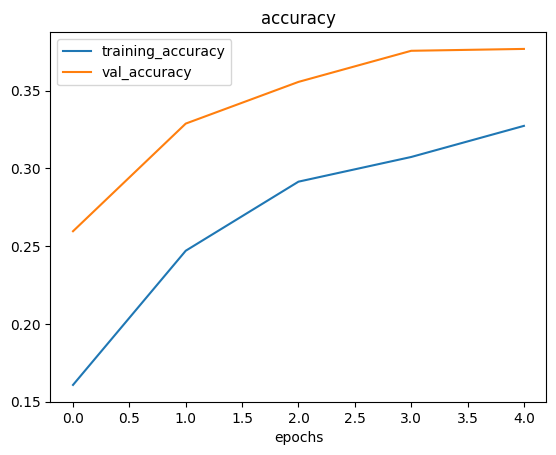

In [108]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

Woah! That looks much better; the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction), so if we were to train for longer, we might see further improvements.

### 7. Repeat Until Satisfied:

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- Restructuring our model's architecture (increasing layers/hidden units)
- Adjust the learning rate
- Try different method of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Training for longer (e.g. 10 epochs instead of 5 epochs)
- Try **transfer learning**

### Making A Prediction With Our Trained Model:

Let's use our trained model to make some predictions on our own custom images!

In [109]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [110]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [111]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names = class_names):
    """
    Imports an image located at filename, makes a prediction with model, and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Add in logic for multi-class & get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


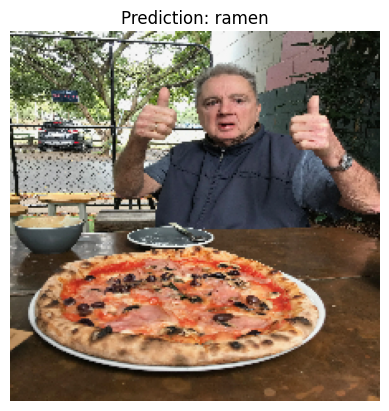

In [112]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = '03-pizza-dad.jpeg',
              class_names = class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


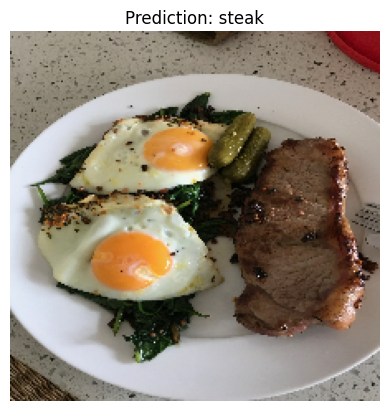

In [113]:
pred_and_plot(model = model_10,
              filename = '03-steak.jpeg',
              class_names = class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


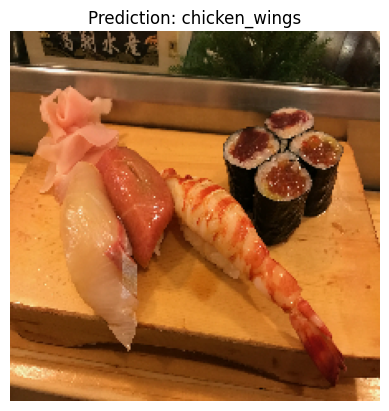

In [114]:
pred_and_plot(model = model_10,
              filename = '03-sushi.jpeg',
              class_names = class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


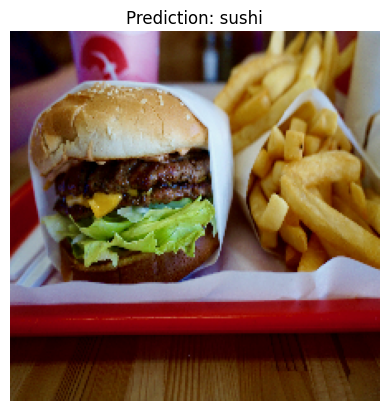

In [115]:
pred_and_plot(model = model_10,
              filename = '03-hamburger.jpeg',
              class_names = class_names)

Looks like our model didn't perform very well on our custom images, but this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


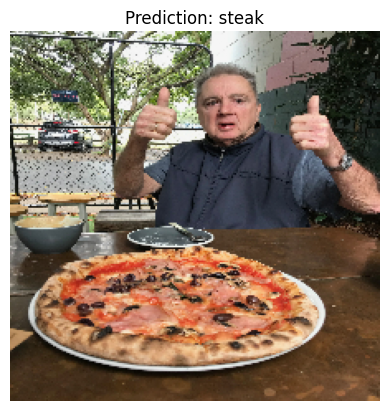

In [119]:
# Good news: Our updated pred_and_plot function works for binary classification too...
pred_and_plot(model = model_3, # Trained on pizza vs. steak
              filename = '03-pizza-dad.jpeg',
              class_names = ['pizza', 'steak'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


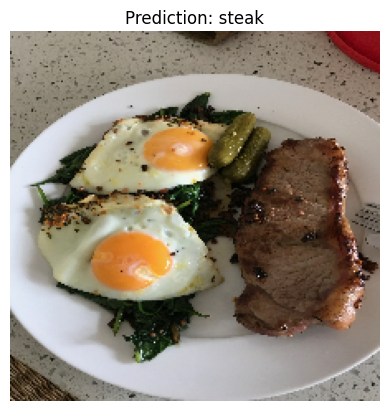

In [121]:
pred_and_plot(model = model_3,
              filename = '03-steak.jpeg',
              class_names = ['pizza', 'steak'])

## Saving And Loading Our Model:

In [ ]:
# Save a model
model_10.save('saved_trained_model_10') #Remember that the saved_model format is deprecated and has been replaced by the explicitly stated keras format!

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_trained_model_10.

In [123]:
# Save a model
model_10.save('saved_trained_model_10.keras')

In [128]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10.keras')
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 362ms/step - accuracy: 0.3705 - loss: 1.8329


[1.822884202003479, 0.376800000667572]

In [129]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.3780 - loss: 1.8228


[1.8228843212127686, 0.376800000667572]